# 4.10 Coding Etiquette & Excel Reporting Step 4 thru 10

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path
path = r'C:\Users\avadr\27-01-2020 Instacart Basket Analysis'

In [3]:
# Importing data set from pickle format
excl = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'excl1.pkl'))

Text(0.5, 1.0, 'Loyalty Distribution')

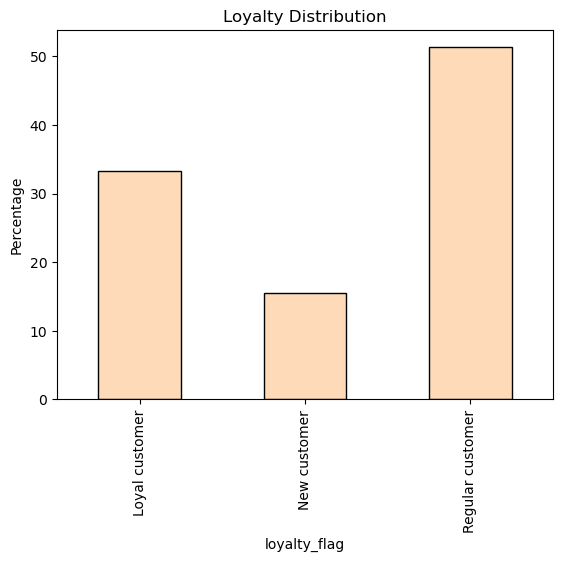

In [4]:
# Plot the percentage distribution of loyalty
loyalty_distribution = (excl['loyalty_flag'].value_counts(normalize=True) * 100).sort_index()
loyalty_distribution.plot.bar(edgecolor = 'black', color=['peachpuff'])
plt.ylabel('Percentage')
plt.title('Loyalty Distribution')

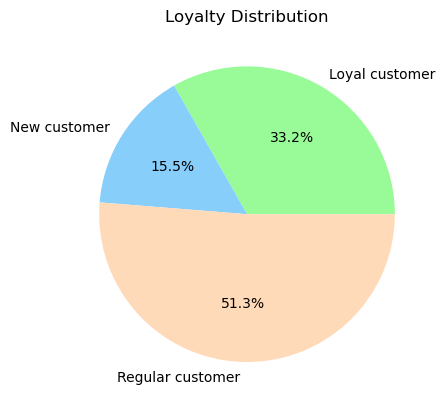

In [6]:
# Plot the pie chart of loyalty
loyalty_pie=plt.pie(loyalty_distribution, labels=loyalty_distribution.index, autopct='%1.1f%%', colors = ['palegreen', 'lightskyblue', 'peachpuff'])
plt.title('Loyalty Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty.png'))

In [6]:
# Fixing formatting to remove scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
# Calculate the mean of prices column grouped by marital_status
avg_prices_by_marital_status = excl.groupby('marital_status')['prices'].mean()

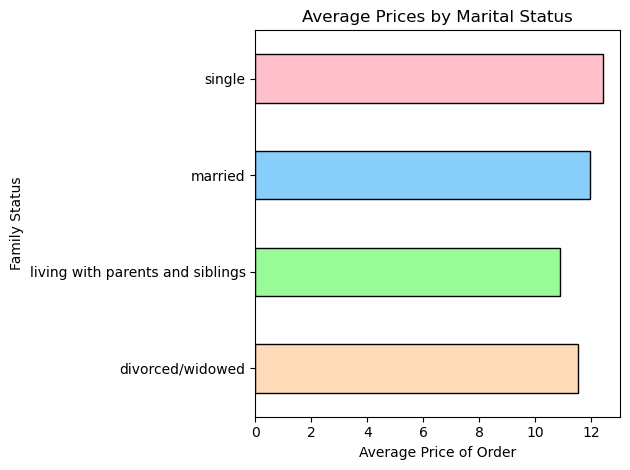

In [8]:
# Creating bar chart for average price by marital status
colors = ['peachpuff', 'palegreen', 'lightskyblue', 'pink']
bar_marital_avg_price = avg_prices_by_marital_status.plot(kind = 'barh', stacked = False, edgecolor = 'black', color = colors)
plt.title('Average Prices by Marital Status')
plt.xlabel('Average Price of Order')
plt.ylabel('Family Status')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_price_family.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

In [9]:
# Calculate the average of prices column grouped by age_group
avg_prices_by_age_group = excl.groupby('age_group')['prices'].mean()

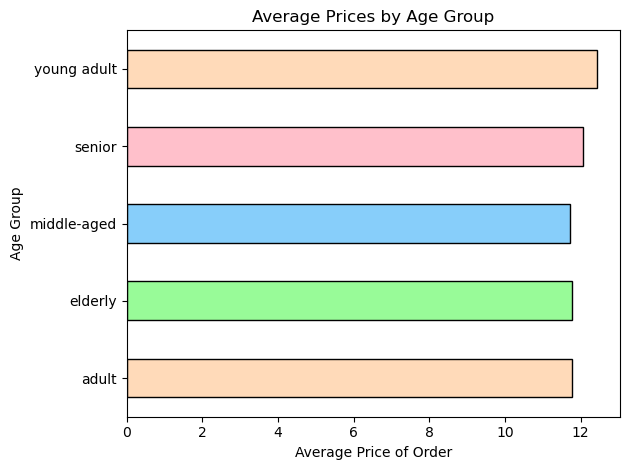

In [10]:
# Creating bar chart for average prices by age group
colors = ['peachpuff', 'palegreen', 'lightskyblue', 'pink']
bar_avg_price = avg_prices_by_age_group.plot(kind = 'barh', stacked = False, edgecolor = 'black',color = colors)
plt.title('Average Prices by Age Group')
plt.xlabel('Average Price of Order')
plt.ylabel('Age Group')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_price_age.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

Text(0.5, 1.0, 'Family Status Distribution')

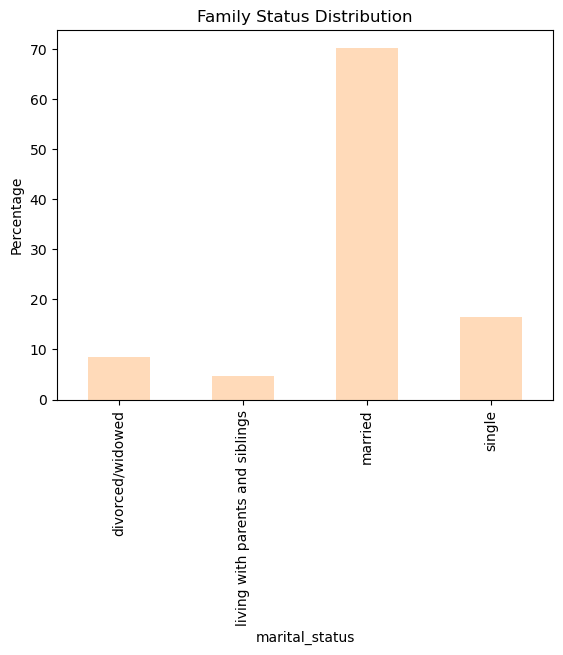

In [4]:
# Plot the percentage distribution of marital status
marital_distribution = (excl['marital_status'].value_counts(normalize=True) * 100).sort_index()
marital_distribution.plot.bar(color=['peachpuff'])
plt.ylabel('Percentage')
plt.title('Family Status Distribution')


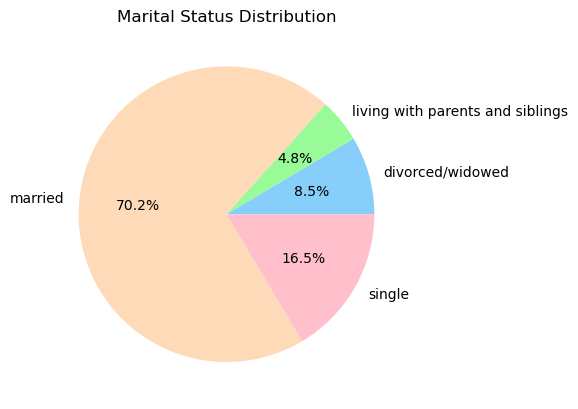

In [5]:
# Plot the pie chart of marital status
marital_pie=plt.pie(marital_distribution, labels=marital_distribution.index, autopct='%1.1f%%', colors = ['lightskyblue', 'palegreen', 'peachpuff', 'pink'])
plt.title('Marital Status Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_marital.png'))

<Axes: xlabel='price_range_loc'>

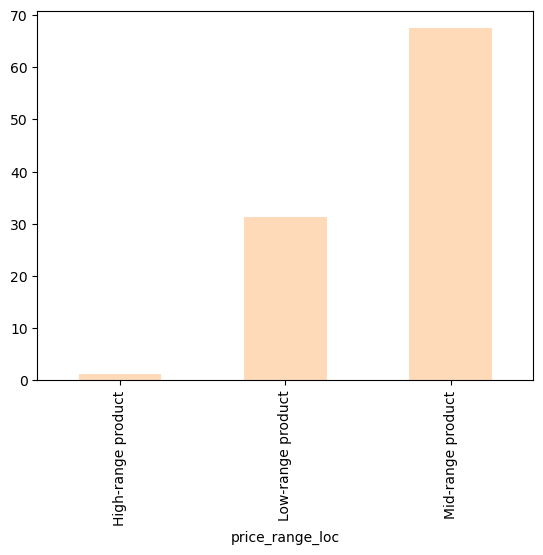

In [13]:
# Plot the percentage distribution of price range 
price_distribution = (excl['price_range_loc'].value_counts(normalize=True) * 100).sort_index()
price_distribution.plot.bar(color=['peachpuff'])

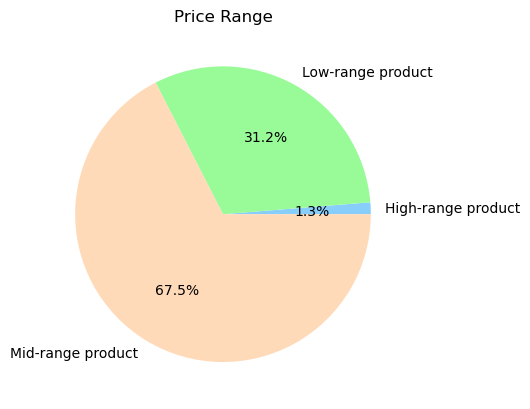

In [14]:
# Plot the pie chart of price range
income_pie=plt.pie(price_distribution, labels=price_distribution.index, autopct='%1.1f%%', colors = ['lightskyblue', 'palegreen', 'peachpuff'])
plt.title('Price Range')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_price_range.png'))

In [10]:
marital_age = excl.groupby('marital_status', 'age_group')['prices'].value_counts().plot.bar(title = 'Order Days by Loyalty Status', xlabel = 'Day of the Week', ylabel = 'Orders Placed', edgecolor = 'black', color=['peachpuff'] * 7 + ['palegreen'] * 7 + ['lightskyblue'] * 7)
plt.tight_layout()

ValueError: No axis named age_group for object type DataFrame

In [15]:
# Creating a seed 
np.random.seed(4)
# Storing boolean values
dev = np.random.rand(len(excl)) <= 0.7

In [16]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [17]:
# Storing 70% data into sample
big = excl[dev]

In [18]:
# Storing 30% data into sample
small = excl[~dev]

In [19]:
len(excl)

30964564

In [20]:
len(big)+len(small)

30964564

In [21]:
# Creating new df for spesific collums
df = small[['order_hour_of_day','prices']]

C:\Users\avadr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\avadr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


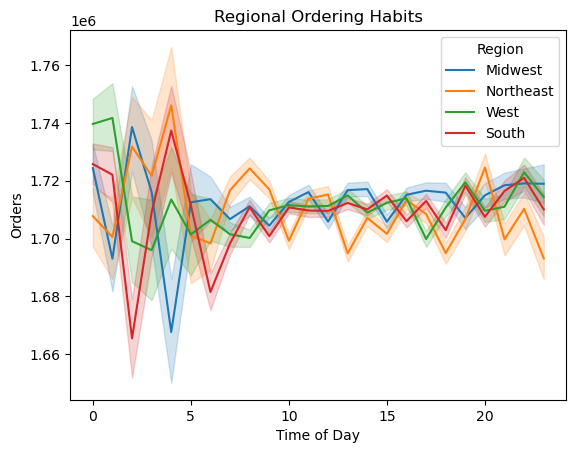

In [24]:
# Create Line Chart
regional_ordering_habits_line = sns.lineplot(data=excl, x='order_hour_of_day', y='order_id', hue='region')
plt.title('Regional Ordering Habits')
plt.xlabel('Time of Day')
plt.ylabel('Orders')
# Display the legend
plt.legend(title='Region', loc='upper right')
# Show the plot
plt.show()

In [25]:
# Saving as PNG
regional_ordering_habits_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regional_ordering_habits_line.png'))